### 1. Оценка модели

- Необходимо выбирать между разными моделями/гиперпараметрами/признаками
- Оценка модели показывает, насколько хорошо модель умеет обобщать на out-of-sample примеры
- Дает численную оценку качества модели



### 2. Методы оценки модели

1. **Обучение и тестирование на одних и тех же данных**
    - Поощряет излишне сложные модели, которые "переобучаются" на обучающих данных и не обязательно будут обобщаться на другие данные.
    
2. **Train/test split**
    - Разделите набор данных на две части, чтобы модель могла обучаться и тестироваться на разных данных.
    - Лучшая оценка производительности на данных, которые не были использованы при обучении, но всё равно является "оценкой с высокой дисперсией".
    - Полезно из-за скорости, простоты и гибкости
    
3. **K-fold cross-validation**
    - Cоздаются "K" разделений на обучающую и тестовую выборки и результаты усредняются.
    - Еще более точная оценка производительности на данных, которые не были использованы при обучении.
    - Обучается в "K" раз медленнее, чем одинарное разделение на обучающую и тестовую выборки.

### 3. Методы оценки модели
    
- **Задачи регрессии:** MSE, MAE, RMSE
- **Classification problems:** Точность классификации и другие

### 4. Точность классификации

[Pima Indian Diabetes dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [1]:
import pandas as pd

pima = pd.read_csv("diabetes.csv", header=0)
pima.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- таргет
    - 1: есть диабет
    - 0: нет диабета
- pregnant
    - количество беременностей

**Research Question:** Можно ли предсказать диабет с помощью оценок здоровья?

In [3]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']

X = pima[feature_cols]

y = pima.label

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

LogisticRegression()

In [6]:
y_pred_class = logreg.predict(X_test)

**Точность классификации:** процент верных предсказаний

In [7]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6458333333333334


Точность классификации 65%

In [8]:
# рассмотрим распределение целевой переменной
y_test.value_counts()

0    123
1     69
Name: label, dtype: int64

In [9]:
# посчитаем количество 1, тк y_test состоит из 1/0 - среднее = % едениц
y_test.mean()

0.359375

36% едениц

In [10]:
1 - y_test.mean()

0.640625

64% нулей

In [11]:
# рассчитаем качество при предсказании только 0
1 - y_test.mean()

0.640625

Если мы будем всегда предсказывать 0 - точность будет 64%
- Точность классификации плохая метрика для нашей задачи - мы не учитываем TP примеры

Сравним исстинные и предсказанные значения

In [12]:
print('True:', y_test.values[0:25])
print('Pred:', y_pred_class[0:25])

True: [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0]
Pred: [1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1]


**Вывод:**

- Точность классификации не дает информации о распределении классов в задачи
- Точность классификации не дает информации о типах ошибок

### 5. Confusion matrix

In [13]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[99 24]
 [44 25]]


In [14]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_class).ravel()
TN, FP, FN, TP

(99, 24, 44, 25)

- **True Positives (TP):** Верно предсказали, что есть диабет
    - 25
- **True Negatives (TN):** Верно предсказали, что диабета нет
    - 99
- **False Positives (FP):** Неверно предсказали, что диабета есть, хотя его нет (Ошибка 1ого рода)
    - 24
- **False Negatives (FN):** Неверное предсказали, что диабета нет, хотя он есть (Ошибка 2ого рода)
    - 44

In [15]:
print('True', y_test.values[0:25])
print('Pred', y_pred_class[0:25])

True [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0]
Pred [1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1]


### 6. Метрики confusion matrix

**Точность классификации:** Оценка точности классификации

In [16]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6458333333333334
0.6458333333333334


**Ошибка классифкации:** Оценка ошибки классификации

In [17]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3541666666666667
0.35416666666666663


**Sensitivity/TPR/Recall:** Когда истинное значение 1, как часто предсказание верно? 

- Как чувствителен классификатор к оценке положительных примеров как положительных?

In [18]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.36231884057971014
0.36231884057971014


**Specificity:** Когда истинное значение 0, как часто предсказание верно?

- Насколько хорошо умеет классификатор определять(находить) негативные примеры?

In [19]:
specificity = TN / (TN + FP)

print(specificity)

0.8048780487804879


Наш классификатор
- Хорошо умеет определять отсутсвие диабета
- Не умеет определять его наличие

**False Positive Rate:** Если истинное значение 0, как часто предсказание неверно?

In [20]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.1951219512195122
0.19512195121951215


**Precision:** Если предсказан 1 класс, как часто это предсказание верно?

- Насколько точен классификатор в предсказании примера класса 1?

In [21]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.5102040816326531
0.5102040816326531


**На чем сфокусироваться?**

- Зависит от задачи, которую решаем(минимизация FP или FN более важна)
- В нашей задаче более важно минимизация FN


- **Spam фильтр** ("spam" == 1): 
    - Оптимизируем **precision или specificity** - оптимизация FP
    - Так как FN идут во **Входящие**, пользователь сам разберется с письмом, нежели важное письмо попадет в Спам папку - FP
- **Детектор подозрительной активности** (1 == "fraud"): 
    - Оптимизируем **sensitivity** - оптимизация FN
    - Лучше перепроверить транзакцию(FP), нежели пропустить реальный fraud(FN)

###  7. Подбор порога классификации

In [22]:
logreg.predict(X_test)[0:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [23]:
# колонка 1 - вероятность 0, колонка 2 - вероятность 1
logreg.predict_proba(X_test)[0:10]

array([[0.43727741, 0.56272259],
       [0.77874466, 0.22125534],
       [0.85642947, 0.14357053],
       [0.81160571, 0.18839429],
       [0.52911267, 0.47088733],
       [0.21913956, 0.78086044],
       [0.94106219, 0.05893781],
       [0.5942376 , 0.4057624 ],
       [0.63900006, 0.36099994],
       [0.27675963, 0.72324037]])

In [24]:
logreg.predict_proba(X_test)[0:10, 1]

array([0.56272259, 0.22125534, 0.14357053, 0.18839429, 0.47088733,
       0.78086044, 0.05893781, 0.4057624 , 0.36099994, 0.72324037])

In [25]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Частота')

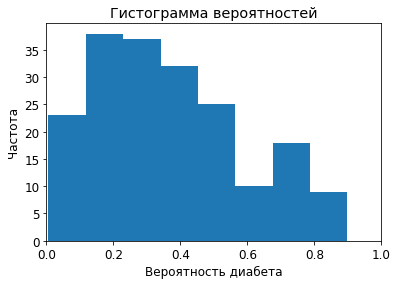

In [27]:

plt.hist(y_pred_prob, bins=8)

plt.xlim(0,1)
plt.title('Гистограмма вероятностей')
plt.xlabel('Вероятность диабета')
plt.ylabel('Частота')

- Анализ гистограммы
    - Около половины предсказаний имеет вероятность от 0.0 до 0.4
    - Предсказаний с веротяностью 0.5 мало - это меньше порога по умолчанию, поэтому большинство примеров в тесте 0
    
- Решение
    - Уменьшить порог классификации
    - Модель станет более чувствительная(sensitivity) к положительным примерам
    - Пример с рамочным детектром - чем ниже порог, тем предметы меньших размеров мы определяем, тем чаще срабатываем. 

In [42]:
# предсказываем диабет, если предсказанная вероятность выше 0.3
from sklearn.preprocessing import binarize

y_pred_class = binarize(y_pred_prob.reshape(-1,len(y_pred_prob)), threshold=0.2)[0]

In [43]:
TN, FP, FN, TP = metrics.confusion_matrix(y_test, y_pred_class).ravel()

In [44]:
# sensitivity увеличилось (было 0.36)
sensitivity = TP / float(FN + TP)
sensitivity

0.927536231884058

In [45]:
# specificity уменьшилось (было 0.8)
specificity = TN / (TN + FP)
specificity

0.35772357723577236

**Вывод:**

- Изменения базового порога 0.5 дает другие результаты
- Его изменение ведет к сдвигу sensitivity/specificity
  - увеличение одного ведет к уменьшению другого

### 8. Receiver Operating Characteristic (ROC) Curves 

**Research Question:** Как посмотреть, как меняется sensitivity vs specificity на разных порогах?

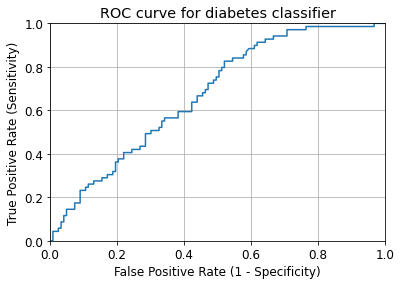

In [32]:
# IMPORTANT: первый аргумент истинные значения, второй - предсказания
# roc_curve возвращает набор точек fpr, tpr, thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [33]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [34]:
evaluate_threshold(0.5)

Sensitivity: 0.36231884057971014
Specificity: 0.8048780487804879


In [35]:
evaluate_threshold(0.2)

Sensitivity: 0.927536231884058
Specificity: 0.3577235772357723


### 9. AUC
Площадь по roc кривой

In [36]:
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.6743843525391776


- Дает единую оценку качества классификатора
- AUC - вероятность, что классификатор даст более высокую оценку положительному объекту нежели отрицательному

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.7425071225071225

### 10. Precision-Recall

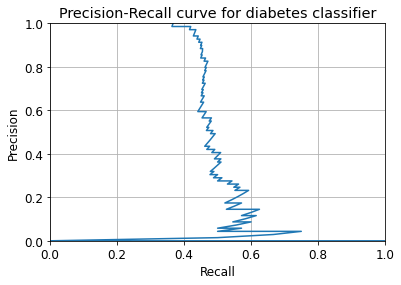

In [38]:
from sklearn.metrics import precision_recall_curve


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

plt.plot(precision, recall)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('Precision-Recall curve for diabetes classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)

In [39]:
from sklearn.metrics import f1_score

f1_list = []
# в конце у нас 
for pr, rc in zip(precision[:len(thresholds) - 1], recall[:len(thresholds)- 1]):
    f1 = 2*(pr*rc)/(pr + rc)
    f1_list.append(f1)

In [40]:
import numpy as np

np.max(f1_list), np.argmax(f1_list), thresholds[np.argmax(f1_list)]

(0.6057692307692308, 49, 0.21520843494500594)